# Exploring Post-Pandemic Trajectory for Airlines

## Preprocessing Steps

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv(r"C:\Users\kruth\Documents\Project1\air traffic.csv")

df.info()
df.head()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB


Index(['Year', 'Month', 'Dom_Pax', 'Int_Pax', 'Pax', 'Dom_Flt', 'Int_Flt',
       'Flt', 'Dom_RPM', 'Int_RPM', 'RPM', 'Dom_ASM', 'Int_ASM', 'ASM',
       'Dom_LF', 'Int_LF', 'LF'],
      dtype='object')

In [7]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].astype(str).agg('-'.join, axis = 1))


In [8]:
df.set_index('Date', inplace = True)
df = df.sort_index()

In [9]:
df.fillna(method='ffill', inplace = True)
df.dropna(inplace = True)

C:\Users\kruth\AppData\Local\Temp\ipykernel_30796\3898673113.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace = True)


In [10]:
numeric_cols = ['Dom_Pax', 'Int_Pax', 'Pax', 'Dom_Flt', 'Int_Flt', 'Flt',
                'Dom_RPM', 'Int_RPM', 'RPM', 'Dom_ASM', 'Int_ASM', 'ASM']
df[numeric_cols] = df[numeric_cols].replace(',','', regex=True).astype(float)

In [14]:
df_yearly = df.groupby('Year').sum()

In [15]:
pre_pandemic = df_yearly.loc[:2019]
pandemic = df_yearly.loc[2020:2021]
post_pandemic = df_yearly.loc[2022:]

## Visualization

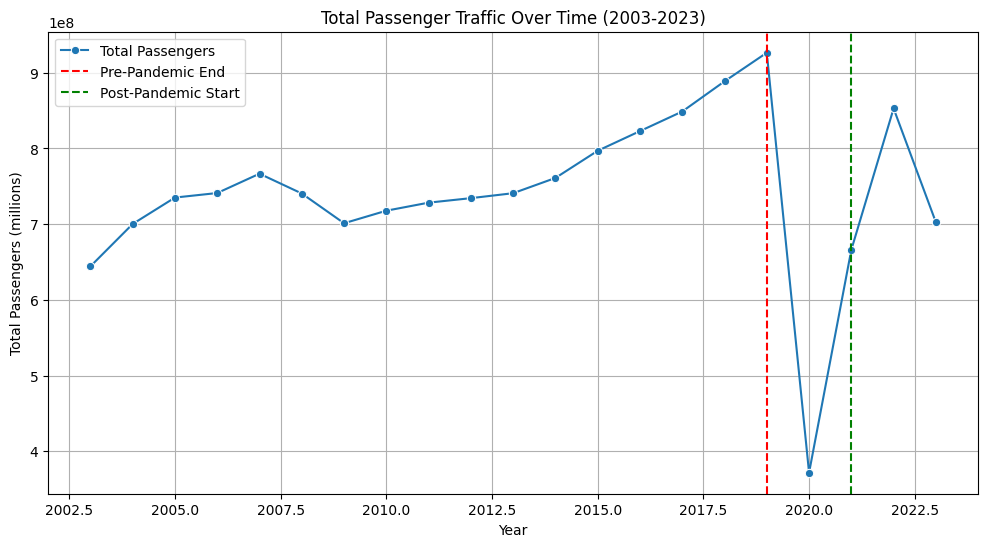

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly, x=df_yearly.index, y='Pax', marker='o', label="Total Passengers")
plt.axvline(2019, color='r', linestyle='--', label="Pre-Pandemic End")
plt.axvline(2021, color='g', linestyle='--', label="Post-Pandemic Start")
plt.title("Total Passenger Traffic Over Time (2003-2023)")
plt.xlabel("Year")
plt.ylabel("Total Passengers (millions)")
plt.legend()
plt.grid(True)
plt.show()

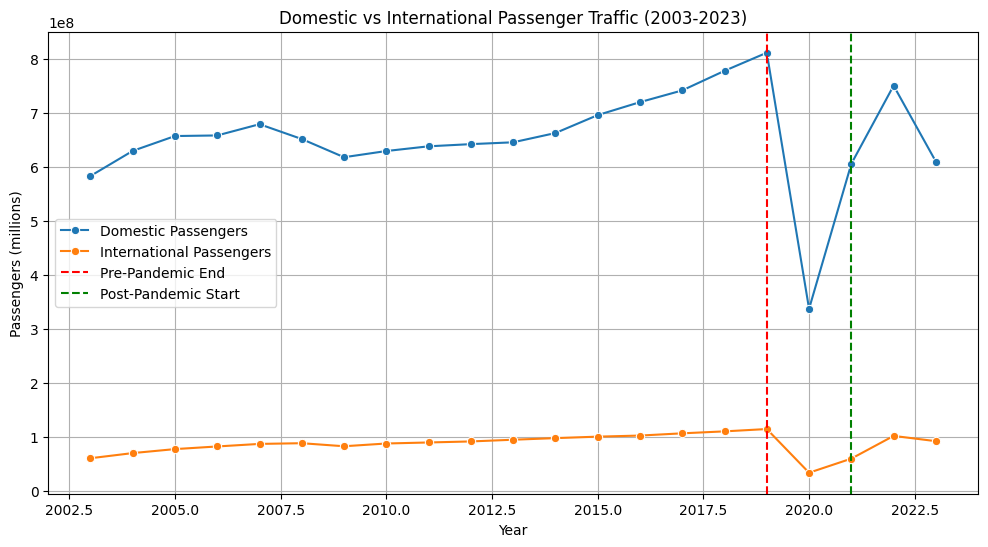

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly, x=df_yearly.index, y='Dom_Pax', marker='o', label="Domestic Passengers")
sns.lineplot(data=df_yearly, x=df_yearly.index, y='Int_Pax', marker='o', label="International Passengers")
plt.axvline(2019, color='r', linestyle='--', label="Pre-Pandemic End")
plt.axvline(2021, color='g', linestyle='--', label="Post-Pandemic Start")
plt.title("Domestic vs International Passenger Traffic (2003-2023)")
plt.xlabel("Year")
plt.ylabel("Passengers (millions)")
plt.legend()
plt.grid(True)
plt.show()

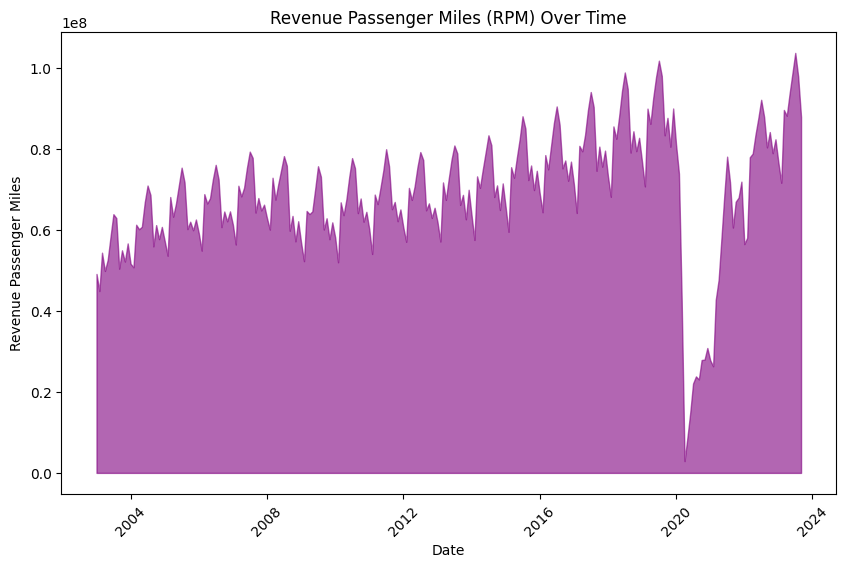

In [18]:
# Create a 'Date' column using Year and Month
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Create area chart for Revenue Passenger Miles (RPM)
plt.figure(figsize=(10, 6))
plt.fill_between(df['Date'], df['RPM'].apply(pd.to_numeric, errors='coerce'), color='purple', alpha=0.6)
plt.title('Revenue Passenger Miles (RPM) Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue Passenger Miles')
plt.xticks(rotation=45)
plt.show()

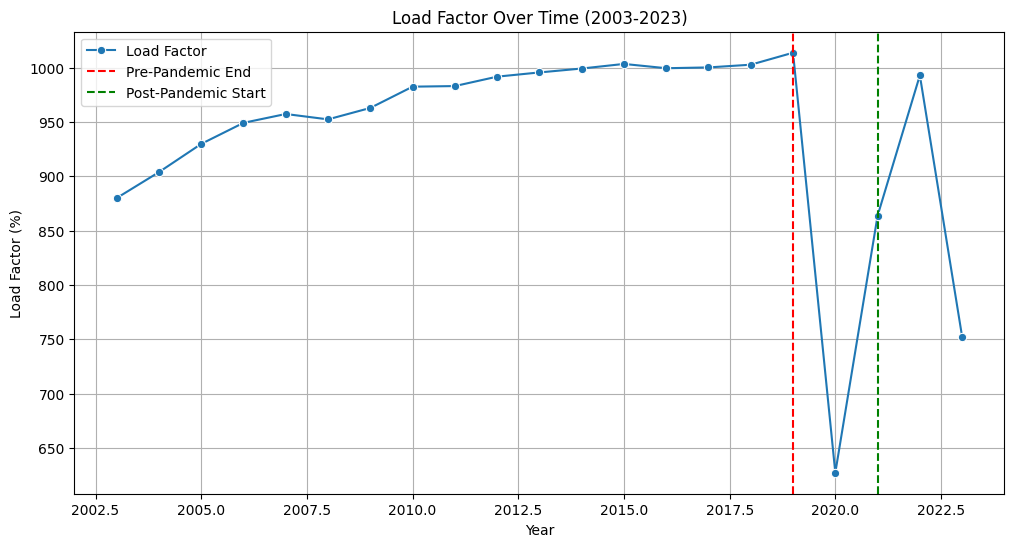

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly, x=df_yearly.index, y='LF', marker='o', label="Load Factor")
plt.axvline(2019, color='r', linestyle='--', label="Pre-Pandemic End")
plt.axvline(2021, color='g', linestyle='--', label="Post-Pandemic Start")
plt.title("Load Factor Over Time (2003-2023)")
plt.xlabel("Year")
plt.ylabel("Load Factor (%)")
plt.legend()
plt.grid(True)
plt.show()

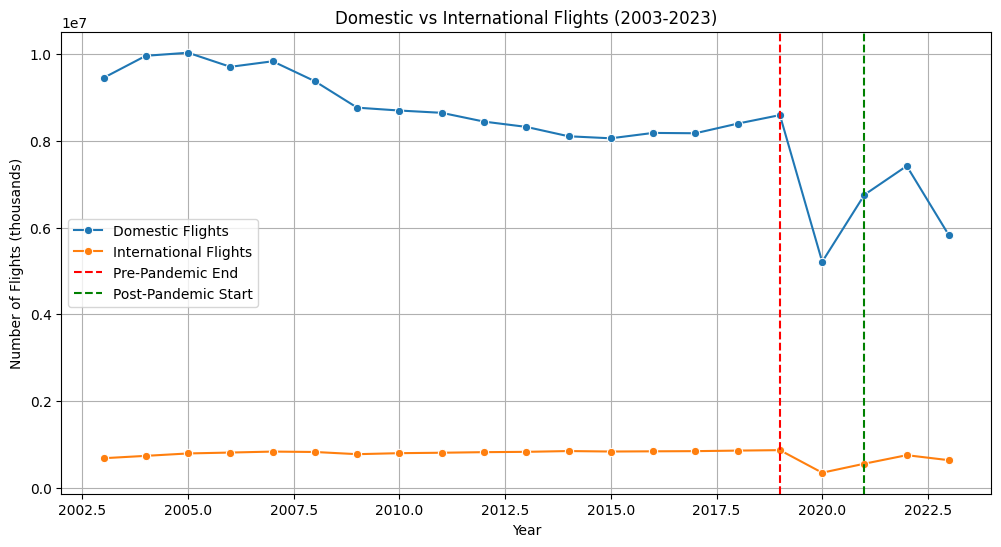

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly, x=df_yearly.index, y='Dom_Flt', marker='o', label="Domestic Flights")
sns.lineplot(data=df_yearly, x=df_yearly.index, y='Int_Flt', marker='o', label="International Flights")
plt.axvline(2019, color='r', linestyle='--', label="Pre-Pandemic End")
plt.axvline(2021, color='g', linestyle='--', label="Post-Pandemic Start")
plt.title("Domestic vs International Flights (2003-2023)")
plt.xlabel("Year")
plt.ylabel("Number of Flights (thousands)")
plt.legend()
plt.grid(True)
plt.show()

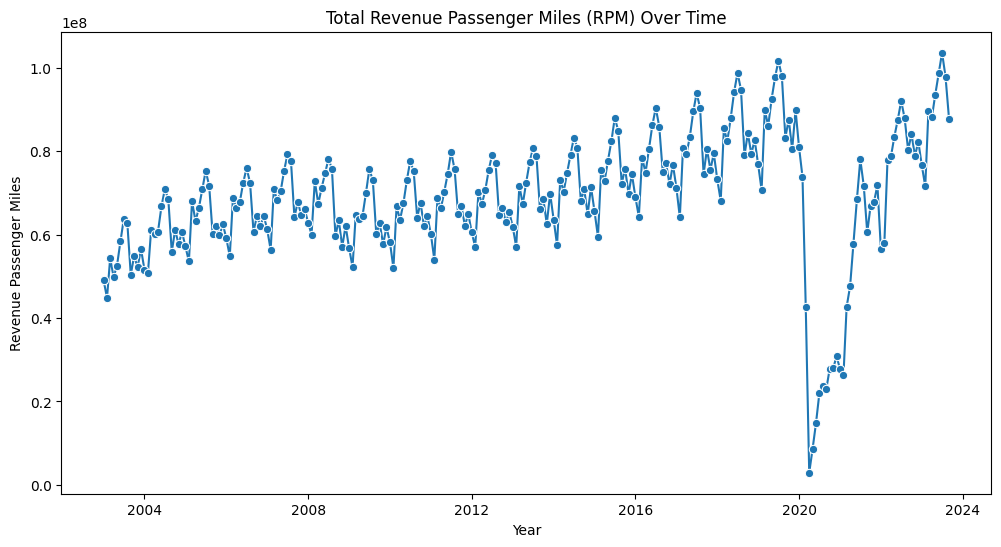

In [21]:
# Convert RPM values to numeric (remove commas and convert to float)
df['RPM'] = df['RPM'].replace({',': ''}, regex=True).astype(float)

# Now, you can continue with grouping by Year and Month
df_yearly = df.groupby(['Year', 'Month']).agg({'RPM': 'sum'}).reset_index()
df_yearly['Date'] = pd.to_datetime(df_yearly[['Year', 'Month']].assign(DAY=1))

# Visualize the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly, x='Date', y='RPM', marker='o')
plt.title('Total Revenue Passenger Miles (RPM) Over Time')
plt.xlabel('Year')
plt.ylabel('Revenue Passenger Miles')
plt.show()